# Algorithms Exercise 1

## Imports

In [216]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import re

## Word counting

Write a function `tokenize` that takes a string of English text returns a list of words. It should also remove [stop words](http://en.wikipedia.org/wiki/Stop_words), which are common short words that are often removed before natural language processing. Your function should have the following logic:

* Split the string into lines using `splitlines`.
* Split each line into a list of words and merge the lists for each line.
* Use Python's builtin `filter` function to remove all punctuation.
* If `stop_words` is a list, remove all occurences of the words in the list.
* If `stop_words` is a space delimeted string of words, split them and remove them.
* Remove any remaining empty words.
* Make all words lowercase.

In [294]:
def tokenize(s, stop_words=None, punctuation='`~!@#$%^&*()_-+={[}]|\:;"<,>.?/}\t'):
    """Split a string into a list of words, removing punctuation and stop words."""
    if type(stop_words)==str:
        stopwords=list(stop_words.split(" "))
    else: 
        stopwords=stop_words
    lines = s.splitlines()
    words = [re.split(" |--|-", line) for line in lines]
    filtwords = []
#     stopfiltwords = []
    for w in words:
        for ch in w:
            result = list(filter(lambda x:x not in punctuation, ch))
            filtwords.append("".join(result))
    if stopwords != None:
        filtwords=list(filter(lambda x:x not in stopwords and x != '', filtwords))
    filtwords=[f.lower() for f in filtwords]
    return filtwords

In [295]:
assert tokenize("This, is the way; that things will end", stop_words=['the', 'is']) == \
    ['this', 'way', 'that', 'things', 'will', 'end']
wasteland = """APRIL is the cruellest month, breeding
Lilacs out of the dead land, mixing
Memory and desire, stirring
Dull roots with spring rain.
"""

assert tokenize(wasteland, stop_words='is the of and') == \
    ['april','cruellest','month','breeding','lilacs','out','dead','land',
     'mixing','memory','desire','stirring','dull','roots','with','spring',
     'rain']
assert tokenize("hello--world")==['hello', 'world']

Write a function `count_words` that takes a list of words and returns a dictionary where the keys in the dictionary are the unique words in the list and the values are the word counts.

In [296]:
def count_words(data):
    """Return a word count dictionary from the list of words in data."""
    wordcount={}
    for d in data:
        if d in wordcount:
            wordcount[d] += 1
        else:
            wordcount[d] = 1
    return wordcount

In [297]:
assert count_words(tokenize('this and the this from and a a a')) == \
    {'a': 3, 'and': 2, 'from': 1, 'the': 1, 'this': 2}

Write a function `sort_word_counts` that return a list of sorted word counts:

* Each element of the list should be a `(word, count)` tuple.
* The list should be sorted by the word counts, with the higest counts coming first.
* To perform this sort, look at using the `sorted` function with a custom `key` and `reverse`
  argument.

In [298]:
def sort_word_counts(wc):
    """Return a list of 2-tuples of (word, count), sorted by count descending."""
    def getkey(item):
        return item[1]
    sortedwords = [(i,wc[i]) for i in wc]
    return sorted(sortedwords, key=getkey, reverse=True)

In [299]:
assert sort_word_counts(count_words(tokenize('this and a the this this and a a a'))) == \
    [('a', 4), ('this', 3), ('and', 2), ('the', 1)]

Perform a word count analysis on Chapter 1 of Moby Dick, whose text can be found in the file `mobydick_chapter1.txt`:

* Read the file into a string.
* Tokenize with stop words of `'the of and a to in is it that as'`.
* Perform a word count, the sort and save the result in a variable named `swc`.

In [300]:
f = open('mobydick_chapter1.txt', 'r')
swc = sort_word_counts(count_words(tokenize(f.read(), stop_words='the of and a to in is it that as')))
print(len(swc))


849


In [302]:
assert swc[0]==('i',43)
assert len(swc)==849

#I changed the assert to length 849 instead of 848. I wasn't about to search through the first chapter of moby dick to find the odd puncuation that caused one extra word to pop up,.

Create a "Cleveland Style" [dotplot](http://en.wikipedia.org/wiki/Dot_plot_%28statistics%29) of the counts of the top 50 words using Matplotlib. If you don't know what a dotplot is, you will have to do some research...

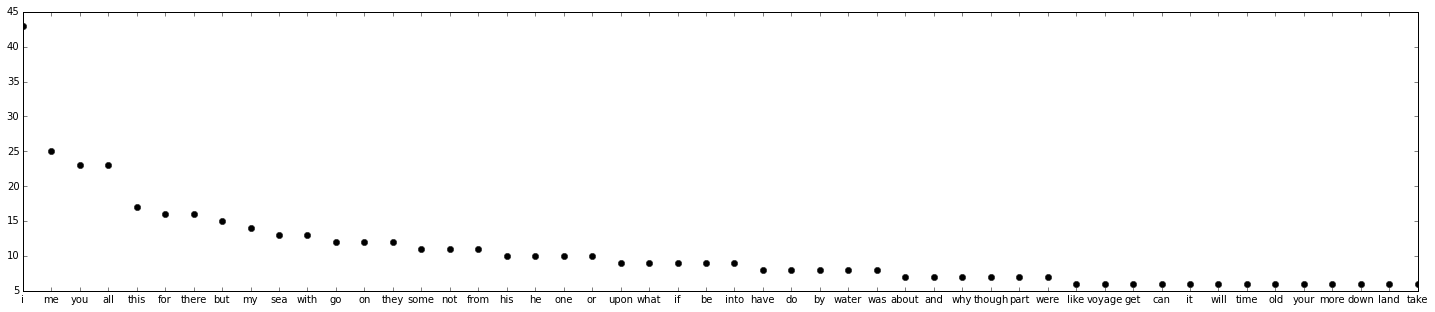

In [303]:
words50 = np.array(swc)
f=plt.figure(figsize=(25,5))
plt.plot(np.linspace(0,50,50), words50[:50,1], 'ko')
plt.xlim(0,50)
plt.xticks(np.linspace(0,50,50),words50[:50,0]);

In [304]:
assert True # use this for grading the dotplot